# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Ethereum is a decentralized open-source blockchain system that features its own cryptocurrency, Ether. ETH works as a platform for numerous other cryptocurrencies, as well as for the execution of decentralized smart contracts.

Ethereum was first described in a 2013 whitepaper by Vitalik Buterin. Buterin, along with other co-founders, secured funding for the project in an online public crowd sale in the summer of 2014. The project team managed to raise $18.3 million in Bitcoin, and Ethereum’s price in the Initial Coin Offering (ICO) was $0.311, with over 60 million Ether sold. Taking Ethereum’s price now, this puts the return on investment (ROI) at an annualized rate of over 270%, essentially almost quadrupling your investment every year since the summer of 2014.

The Ethereum Foundation officially launched the blockchain on July 30, 2015, under the prototype codenamed “Frontier.” Since then, there has been several network updates — “Constantinople” on Feb. 28, 2019, “Istanbul” on Dec. 8, 2019, “Muir Glacier” on Jan. 2, 2020, “Berlin” on April 14, 2021, and most recently on Aug. 5, 2021, the “London” hard fork.

Ethereum’s own purported goal is to become a global platform for decentralized applications, allowing users from all over the world to write and run software that is resistant to censorship, downtime and fraud.



## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="de'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Pada tahap ini saya menggunakan fungsi`.find()` untuk mencari elemen 'table' sebagai target untuk dilakukan scraping.

In [4]:
table = soup.find('table')
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


Finding row length.

In [5]:
all = table.find_all('tr')
row_length = len(all)
row_length

548

Setelah menentukan elemen mana yang ingin dijadikan sebagai target untuk scraping, tahap selanjutnya menggunakan looping statement untuk ekstrasi data dari web ke list.

In [6]:
temp = [] #initiating a tuple

for i in range(1, row_length):
    
    #row
    row = table.find_all('tr')[i]

    #Date
    Date = row.find_all('th')[0].text
    
    #Volume
    Volume = row.find_all('td')[1].text
    
    temp.append((Date, Volume))

In [7]:
temp = temp[::-1]

## Creating data frame & Data wrangling

Put the array into dataframe

In [8]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date', 'Volume'))
df.head()

,Date,Volume
0,2020-01-01,"\n$7,103,187,151\n"
1,2020-01-02,"\n$6,623,732,041\n"
2,2020-01-03,"\n$6,497,297,884\n"
3,2020-01-04,"\n$9,655,245,100\n"
4,2020-01-05,"\n$6,958,393,690\n"


Pada kolom `Volume` dilakukan penyusaian format untuk di konversi dari tipe data object menjadi integer menggunakan fungsi `.astype()`, sebelum dilakukan konversi tersebut saya menghilangkan karakter '\n', '$' dan ',' menggunakan fungsi `.str.replace()`. Sedangkan pada kolom `Date` dilakukan konversi tipe data menjadi datetime64 menggunakan `.astype()`.

In [9]:
df['Volume'] = df['Volume'].str.replace('\n','')
df['Volume'] = df['Volume'].str.replace('$','', regex=True)
df['Volume'] = df['Volume'].str.replace(',','')
df['Volume'] = df['Volume'].astype(int)
df['Date'] = df['Date'].astype('datetime64[ns]')

In [10]:
df.dtypes

Date      datetime64[ns]
Volume             int64
dtype: object

Selanjutnya adalah menggubah index menggunakan kolom `Date` menggunakan fungsi `.set_index`

In [11]:
df = df.set_index('Date')

Dikarenakan data ini merupakan data timeseries, tipe grafik yang cocok adalah line chart. 

<AxesSubplot:xlabel='Date'>

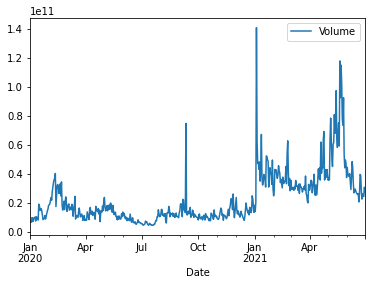

In [25]:
df.plot(kind='line')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Grafik Volume ETH'}, xlabel='Date', ylabel='Volume(100 milyar USD )'>

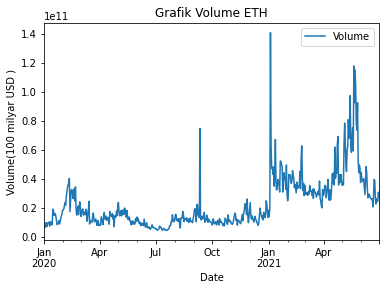

In [24]:
df.plot(kind='line', ylabel='Volume(100 milyar USD )', title='Grafik Volume ETH')

Pergerakan volume ethereum cukup fluktuatif dari hari ke hari. Dengan volume tertinggi $140.906.534.191 pada 4 januari 2021 dan volume terendah $4.344.879.746 pada 18 Juli 2020. Rata-rata pergerakan volume ethereum ini berada di $22.445.152.287. Secara general trend dari pergerakan volume ethereum cenderung bullish.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.